In [124]:
import nltk
import pandas as pd
import seaborn as sns

from tqdm import tqdm_notebook

from nltk.corpus import state_union as sotu
import numpy as np

# Pronoun Usage as a Measure of Power Personalization: A General Theory with Evidence from the Chinese-Speaking World

- Amy H. Liu
- Discussion notebook by Jacob Eisenstein

- Are non-democratic leaders constrained by institutions?
- To what extent is power located in the leader's person?
- Proposal: textual analysis can help answer these questions... maybe even in advance of concrete actions by the leader?

![Putin riding a bear](https://qph.fs.quoracdn.net/main-qimg-d6c9a75c89bb984aae6bec8f199eb610-c)

## The theory

- There is a well-elaborated theory of how **pronouns** relate to the speaker's internal mental state: happiness, depression, confidence, and insecurity. 
    - initially from social psychologist James Pennebaker
    - lots of follow-on work in fields like social computing and human-computer interaction 
- Pronouns are (argued to be) harder for speakers to control, and therefore more revealing than "content words".
- Liu's proposal
    - **First-person singular** (1PS): credit-claiming for specific policy achievements
    - **Third-person** (3P): blaming of adversaries
    - **First-person plural** (1PL): identification of the leader's person with the state and nation

## The quantitative analysis

- Comparative analysis of three Mandarin-speaking leaders: Mao Zedong, Chiang Kai-shek, and Lee Kuan Yew
- The analysis also considers their successors, who were presumably less personalistic and more institutionally constrained
- Main results
    - Each leader used more 1PP than his successors, and less 3P and 1PL
    - Over time, the pronoun groups track the `xconst` and `bossism` metrics as predicted by the theory

# Questions for discussion

- Do these results generalize beyond these three specific leaders?
- What is the variance across individuals in the larger population, and to what extent do the temporal results simply duplicate the leader-specific results?
- Validation for the proposed connection between pronoun groups and political communication activities, such as credit claiming?

# Pronoun usage in state-of-the-union addresses

In [139]:
nltk.download('state_union');

[nltk_data] Downloading package state_union to
[nltk_data]     /home/jacob/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


In [95]:
fps_set = {'i','me','my','mine'}
fpp_set = {'we','us','our','ours'}
tp_set = {'he','she','him','her','his','hers','they','them','their','theirs'}

In [67]:
results = []
for doc in sotu.fileids():
    fps_count = len([word for word in sotu.words(doc) if word.lower() in fps_set])
    fpp_count = len([word for word in sotu.words(doc) if word.lower() in fpp_set])
    tp_count = len([word for word in sotu.words(doc) if word.lower() in tp_set])
    tot_count = len(sotu.words(doc))
    result = {'doc':doc,
              '1ps':fps_count/tot_count,
              '1pp':fpp_count/tot_count,
              '3p':tp_count/tot_count,
              'year':int(doc[:4])}
    results.append(result)

In [68]:
df = pd.DataFrame(results)

In [138]:
df.head(7)

,1pp,1ps,3p,doc,year,personalism
0,0.034612,0.013096,0.007016,1945-Truman.txt,1945,1.720930
1,0.014127,0.005220,0.005351,1946-Truman.txt,1946,1.336420
2,0.024926,0.007418,0.006677,1947-Truman.txt,1947,1.768421
3,0.044347,0.005784,0.006310,1948-Truman.txt,1948,3.666667
4,0.040608,0.006288,0.007074,1949-Truman.txt,1949,3.039216
5,0.046712,0.006170,0.008285,1950-Truman.txt,1950,3.231707
6,0.052282,0.004874,0.014843,1951-Truman.txt,1951,2.651685


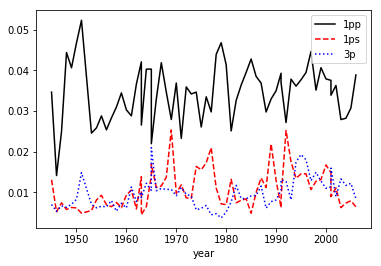

In [71]:
df.plot('year',['1pp','1ps','3p'],style=['k-','r--','b:']);

In [70]:
df['personalism'] = (df['1pp'] / (df['1ps'] + df['3p']))

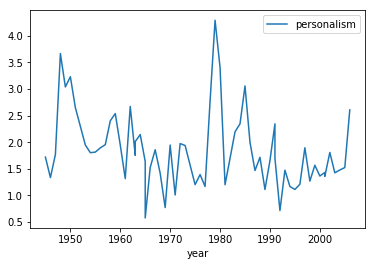

In [72]:
df.plot('year','personalism');

The language of personalist leadership in the US?

- High: Trumar, Carter, early Reagan
- Low: Johnson, Nixon, Clinton

# Co-occurrence

The paper argues that the pronouns groups reflect the following tendencies:

- First-person singular: credit-claiming
- Third-person singular: blaming
- First-person plural: identification of self with nation

Additional validation: what words that tend to accompany these pronoun groups?

- Method: count words that appear within $k=7$ positions of a member of the pronoun group
- For each group, sort by 
\begin{equation}
\eta_c = \log \frac{p(w \mid \text{ near pronoun of class } c) }{p(w)}
\end{equation}

In [103]:
neighbors = defaultdict(Counter)
for doc in tqdm_notebook(sotu.fileids()):
    for set_name,word_set in zip(['1ps','1pp','3p'],[fps_set,fpp_set,tp_set]):
        idxs = [i for i,word in enumerate(sotu.words(doc)) if word.lower() in word_set]
        local_neighbors = [word.lower() for i,word in enumerate(sotu.words(doc))
                    if np.abs(np.array(idxs) - i).min() < window_size]
        neighbors[set_name] += Counter(local_neighbors)

In [113]:
tot_counts = Counter()
for doc in tqdm_notebook(sotu.fileids()):
    tot_counts += Counter([word.lower() for word in sotu.words(doc)])

In [117]:
log_odds = dict()
for group, n_counts in neighbors.items():
    log_odds[group] = Counter()
    for word,count in n_counts.items():
        if count > 5:
            log_odds[group][word] = np.log(count) - np.log(tot_counts[word])

In [135]:
for lexicon,log_odd_lex in log_odds.items(): 
    print(lexicon+' ===========================')
    print(' '.join([word[0] for word in log_odd_lex.most_common(25)]))
    print()

1ps ===========================
i my me mine personally pleased am urge announce mention colleagues convinced m recommend repeat outlined recommending requesting myself propose ask submit request accordingly visited

1pp ===========================
we our us forefathers ours unite bicentennial reminds owe gather intensify allies traditions enrich shouldn lesson shores cherish learned strengths confront ignore blessed strive enemies

3p ===========================
his he them her they their him theirs she deprived futures deserve talents dead lose perform wrote son himself destroyed manage gave wife tools color



- **First-person singular**: specific proposals (announce, recommend, outlined, propose, request)
- **First-person plural**: themes of unity (forefathers, unite, traditions, cherish, strengths, enemies)
- **Third-person**: a mix, but some negative sentiment (deprived, dead, lose, destroyed)

## Summary

- If text could **predict** the transition to personalist rule, that would be incredibly cool.
- A crucial next step is generalization beyond idiosyncracies of these three particular leaders.
    - To what extent are these results due to within-speaker variation?
    - To what extent are they due to leader selection?
- Co-occurrence analysis mostly supports proposed hypothesis about what each pronoun group does.
    - But again, within-speaker analysis would make this much more compelling.